(distr-coniugate-1-notebook)=
# Distribuzioni coniugate

In questo capitolo, ci focalizziamo sulla derivazione della distribuzione a posteriori attraverso l'uso di una distribuzione a priori coniugata. Sarà esaminato in dettaglio il modello beta-binomiale, un esempio paradigmatico che evidenzia il vantaggio dell'uso delle distribuzioni a priori coniugate in inferenza bayesiana. L'impiego di tali distribuzioni facilita notevolmente il processo di inferenza, permettendo di ottenere una distribuzione a posteriori attraverso calcoli analitici diretti e semplificati. Questa metodologia non solo rende il processo di inferenza più gestibile ma anche più intuitivo, offrendo una chiara dimostrazione di come le scelte a priori influenzino l'analisi bayesiana.

## Preparazione del Notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import arviz as az
from scipy import stats
from scipy.integrate import trapezoid

In [19]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "distribuzioni_coniugate_1"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

## Derivazione analitica della distribuzione a posteriori

Le distribuzioni a priori coniugate costituiscono una classe speciale di distribuzioni di probabilità aventi una particolare caratteristica: se la distribuzione a priori appartiene a questa classe, anche la distribuzione a posteriori appartiene alla stessa classe, ovvero mantiene la stessa forma funzionale. Questo aspetto semplifica notevolmente l'aggiornamento delle nostre credenze riguardo al parametro di interesse, in quanto coinvolge semplicemente la modifica dei parametri della distribuzione a priori. Ad esempio, quando selezioniamo una distribuzione a priori Beta e la verosimiglianza corrisponde a una distribuzione binomiale, la distribuzione a posteriori sarà anch'essa una distribuzione Beta.

Nonostante le distribuzioni a priori coniugate siano la scelta preferibile dal punto di vista matematico, in quanto permettono di calcolare analiticamente la distribuzione a posteriori evitando calcoli complessi, le moderne tecniche di inferenza bayesiana offrono flessibilità nell'utilizzo di una vasta gamma di distribuzioni a priori. Questa flessibilità elimina la necessità di vincolarsi esclusivamente alle distribuzioni coniugate. Tuttavia, le distribuzioni a priori coniugate continuano a giocare un ruolo didattico rilevante, poiché presentano una soluzione analitica per il processo di aggiornamento bayesiano. Nel presene capitolo, esploreremo dettagliatamente il modello beta-binomiale, in cui la verosimiglianza binomiale si combina con la scelta di una distribuzione a priori Beta. Questo modello rappresenta la base dell'inferenza bayesiana su una proporzione.

## Lo schema beta-binomiale 

La distribuzione Beta è utilizzata per descrivere la variabilità di una variabile casuale che è limitata all'intervallo [0,1]. Questa distribuzione è definita come:

$$
\text{Beta}(\theta \mid \alpha, \beta) = \frac{1}{B(\alpha, \beta)}\theta^{\alpha-1} (1-\theta)^{\beta-1}, \quad \text{per } \theta \in (0, 1),
$$

dove $B(\alpha, \beta)$ rappresenta la funzione Beta di Eulero, espressa attraverso la funzione Gamma ($\Gamma$) come segue:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}.
$$

La funzione Gamma, a sua volta, è definita per i valori positivi di $x$ e generalizza il concetto di fattoriale. I parametri $\alpha$ e $\beta$ modulano la forma della distribuzione Beta, influenzando la sua varianza e la sua moda.

Nel contesto bayesiano, la distribuzione Beta è spesso usata come distribuzione a priori per modellare la nostra conoscenza preliminare sulla probabilità di successo $\theta$ in una serie di eventi di Bernoulli. Dopo aver raccolto i dati, possiamo aggiornare questa conoscenza a priori in base alle osservazioni effettive mediante l'approccio di aggiornamento bayesiano.

La densità a priori, data da $\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$, viene combinata con la funzione di verosimiglianza che, in caso di dati binomiali, assume la forma $\theta^{y} (1 - \theta)^{n - y}$. Moltiplicando la densità a priori per la verosimiglianza e tralasciando il fattore di normalizzazione (che sarà calcolato in seguito), otteniamo una forma che ricorda quella di una distribuzione Beta:

$$
\theta^{\alpha + y - 1} (1 - \theta)^{\beta + n - y - 1}.
$$

Questa è la distribuzione a posteriori non normalizzata per $\theta$. Per convertirla in una distribuzione di probabilità valida, dobbiamo normalizzarla in modo che l'integrale su tutto il suo dominio sia pari a 1. Questo si ottiene dividendo per la funzione Beta $B(\alpha', \beta')$, dove $\alpha' = \alpha + y$ e $\beta' = \beta + n - y$.

In conclusione, la distribuzione a posteriori per $\theta$, dopo aver osservato $y$ successi in $n$ prove, diventa una distribuzione Beta con i parametri aggiornati $\alpha'$ e $\beta'$:

$$
\text{Beta}(\theta \mid \alpha + y, \beta + n - y).
$$

La normalizzazione richiede il calcolo di $B(\alpha + y, \beta + n - y)$, che utilizza la funzione Gamma per garantire che l'area sotto la curva della funzione di densità di probabilità sia esattamente 1 sull'intervallo [0,1].

Questo esempio illustra un'applicazione dell'analisi coniugata, dove la scelta di una distribuzione a priori Beta, combinata con una funzione di verosimiglianza binomiale, produce una distribuzione a posteriori che è ancora una distribuzione Beta. Questo risultato è noto come "caso coniugato beta-binomiale", riassunto nel seguente teorema:

> **Teorema:** Se la funzione di verosimiglianza è binomiale, data da $Bin(n, y \mid \theta)$, e la distribuzione a priori è una Beta con parametri $(\alpha, \beta)$, allora la distribuzione a posteriori di $\theta$ sarà una distribuzione Beta con parametri aggiornati $(\alpha + y, \beta + n - y)$.

Questa relazione facilita l'aggiornamento bayesiano delle nostre credenze sulla proporzione di successi in una serie di prove, utilizzando un approccio analitico e computazionalmente efficiente.

## Esempio 

In un esempio ispirato da {cite:t}`McElreath_rethinking` nel suo libro "Statistical Rethinking", consideriamo un esperimento dove otteniamo 6 successi (indicati come "acqua") su un totale di 9 prove (immaginate come lanci di un mappamondo). La verosimiglianza binomiale per questo esperimento è data da:

$$
\theta^y (1-\theta)^{n-y},
$$

dove $y = 6$ è il numero di successi e $n = 9$ è il numero totale di prove.

Se scegliamo una distribuzione a priori Beta con parametri $\alpha = 2$ e $\beta = 2$, possiamo utilizzare l'aggiornamento bayesiano per calcolare i parametri della distribuzione a posteriori, dato l'esito delle nostre prove. L'applicazione del teorema di Bayes porta a una distribuzione a posteriori Beta con i parametri aggiornati $\alpha' = \alpha + y = 8$ e $\beta' = \beta + n - y = 5$.

Ora, vediamo come visualizzare le tre distribuzioni di interesse: la distribuzione a priori Beta($2, 2$), la verosimiglianza binomiale per $y=6$ e $n=9$, e la distribuzione a posteriori Beta($8, 5$). 

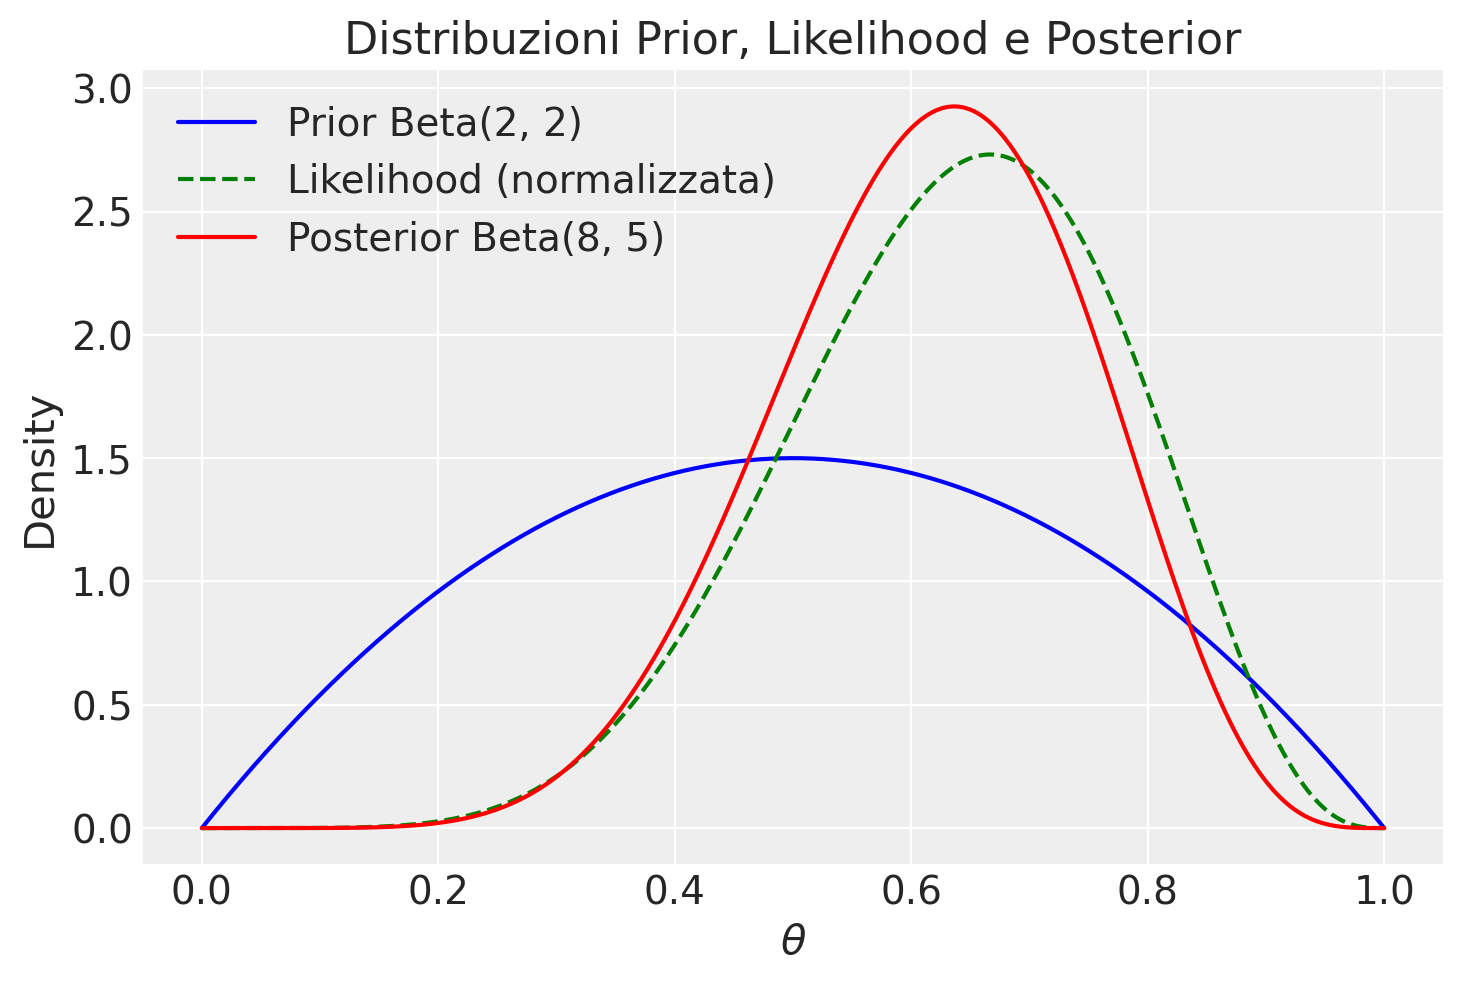

In [20]:
# Definiamo i parametri
alpha_prior, beta_prior = 2, 2
y, n = 6, 9
alpha_post, beta_post = alpha_prior + y, beta_prior + n - y

# Creiamo un array di valori theta
theta = np.linspace(0, 1, 1000)  # Aumentiamo la risoluzione per un calcolo più preciso

# Calcoliamo le PDF
prior_pdf = stats.beta.pdf(theta, alpha_prior, beta_prior)
likelihood = theta**y * (1-theta)**(n-y)

# Normalizziamo la verosimiglianza
likelihood_integral = trapezoid(likelihood, theta)
normalized_likelihood = likelihood / likelihood_integral

posterior_pdf = stats.beta.pdf(theta, alpha_post, beta_post)

# Disegnamo le distribuzioni
plt.plot(theta, prior_pdf, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='blue')
plt.plot(theta, normalized_likelihood, label='Likelihood (normalizzata)', linestyle='--', color='green')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({alpha_post}, {beta_post})', color='red')

plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Distribuzioni Prior, Likelihood e Posterior')
_ = plt.legend()

In questo codice, la funzione `trapezoid` viene usata per calcolare l'integrale della funzione di verosimiglianza non normalizzata su θ, fornendo il fattore di normalizzazione. Dividendo la funzione di verosimiglianza per questo fattore, otteniamo una funzione di verosimiglianza normalizzata, il cui integrale su [0, 1] è uguale a 1. La normalizzazione della verosimiglianza è eseguita solo a scopo di visualizzazione, per facilitare il confronto tra le curve. 

## Lo studio sull'obbedienza di Milgram

Esaminiamo ora un esempio discuso da {cite:t}`Johnson2022bayesrules`. In uno studio molto famoso, Stanley Milgram ha studiato la propensione delle persone a obbedire agli ordini delle figure di autorità, anche quando tali ordini potrebbero danneggiare altre persone (Milgram 1963). Nell'articolo, Milgram descrive lo studio come segue:

> consistente nell'ordinare a un soggetto ingenuo di somministrare una scossa elettrica a una vittima. Viene utilizzato un generatore di scosse simulato, con 30 livelli di tensione chiaramente contrassegnati che vanno da IS a 450 volt. Lo strumento porta delle designazioni verbali che vanno da Scossa Lieve a Pericolo: Scossa Grave. Le risposte della vittima, che è un complice addestrato dell'esperimentatore, sono standardizzate. Gli ordini di somministrare scosse vengono dati al soggetto ingenuo nel contesto di un 'esperimento di apprendimento' apparentemente organizzato per studiare gli effetti della punizione sulla memoria. Man mano che l'esperimento procede, al soggetto ingenuo viene ordinato di somministrare scosse sempre più intense alla vittima, fino al punto di raggiungere il livello contrassegnato Pericolo: Scossa Grave.

In altre parole, ai partecipanti allo studio veniva dato il compito di testare un altro partecipante (che in realtà era un attore addestrato) sulla loro capacità di memorizzare una serie di item. Se l'attore non ricordava un item, al partecipante veniva ordinato di somministrare una scossa all'attore e di aumentare il livello della scossa con ogni fallimento successivo. I partecipanti non erano consapevoli del fatto che le scosse fossero finte e che l'attore stesse solo fingendo di provare dolore dalla scossa.

Nello studio di Milgram, 26 partecipanti su 40 hanno somministrato scosse al livello "Pericolo: Scossa Grave". Il problema richiede di costruire la distribuzione a posteriori della probabilità $\theta$ di infliggere una scossa a l livello "Pericolo: Scossa Grave", ipotizzando che uno studio precedente aveva stabilito che $\theta$ segue una distribuzione Beta(1, 10).

Iniziamo a fornire una rappresentazione grafica della distribuzione a priori.

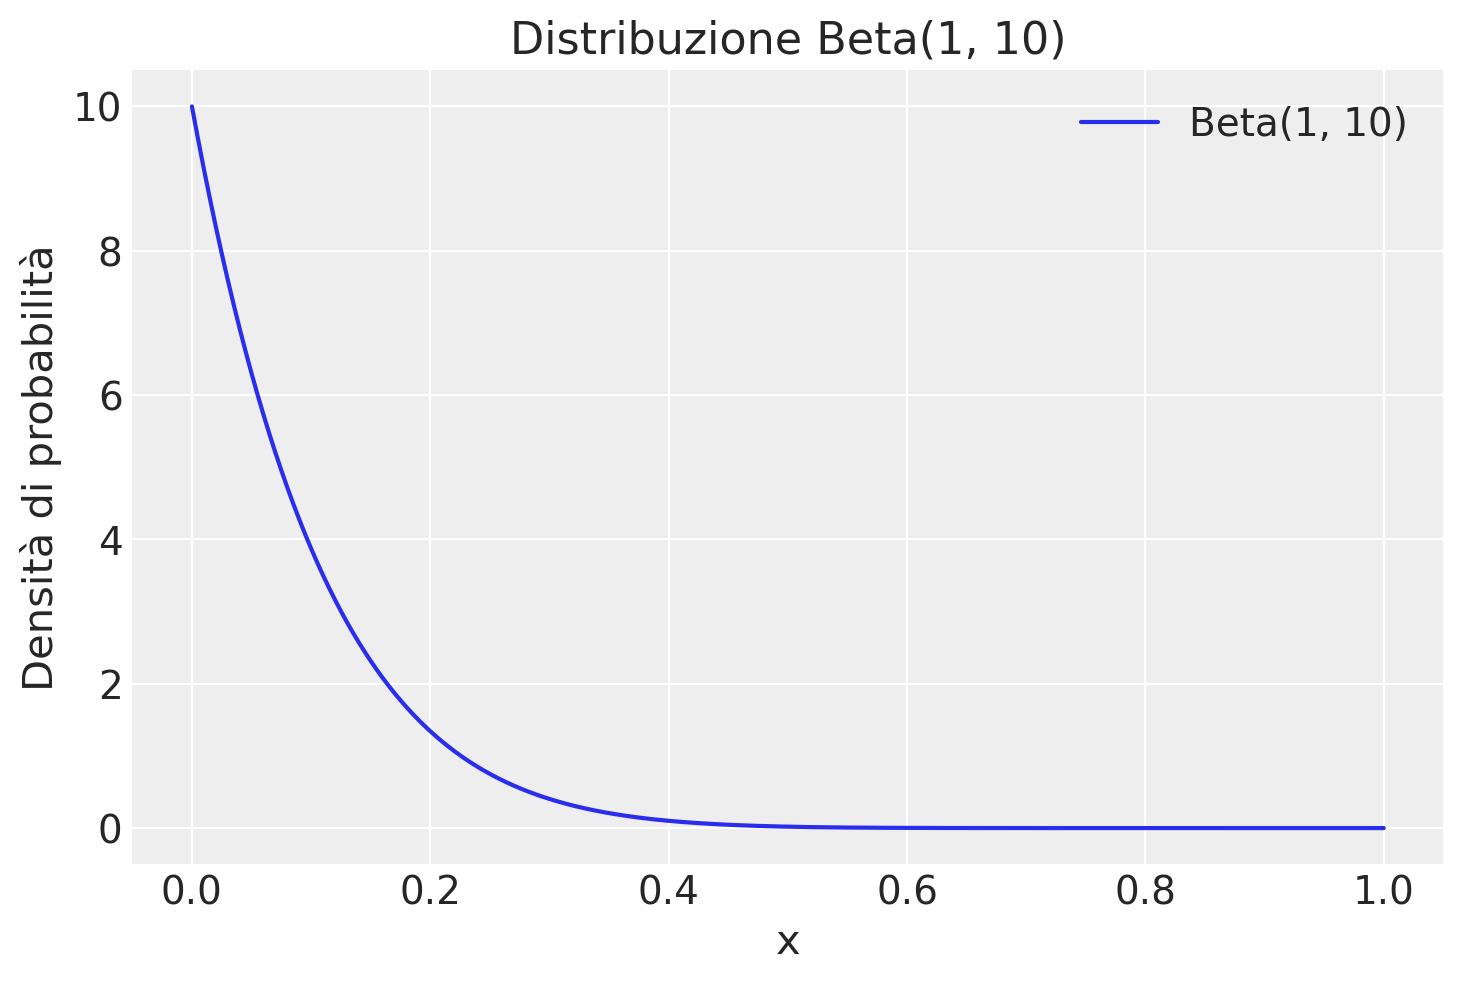

In [22]:
# Impostazione dei parametri della distribuzione Beta
alpha = 1
beta_val = 10

# Creazione di valori x per il plot
x_values = np.linspace(0, 1, 1000)

# Calcolo della densità di probabilità per ogni valore di x
beta_pdf = stats.beta.pdf(x_values, alpha, beta_val)

# Plot della densità di probabilità
plt.plot(x_values, beta_pdf, label='Beta(1, 10)')
plt.title('Distribuzione Beta(1, 10)')
plt.xlabel('x')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.show()

La distribuzione a posteriori è una Beta di parametri aggiornati

In [23]:
y = 26
n = 40

alpha_prior = 1
beta_prior = 10

alpha_post = alpha_prior + y
beta_post = beta_prior + n - y

alpha_post, beta_post

(27, 24)

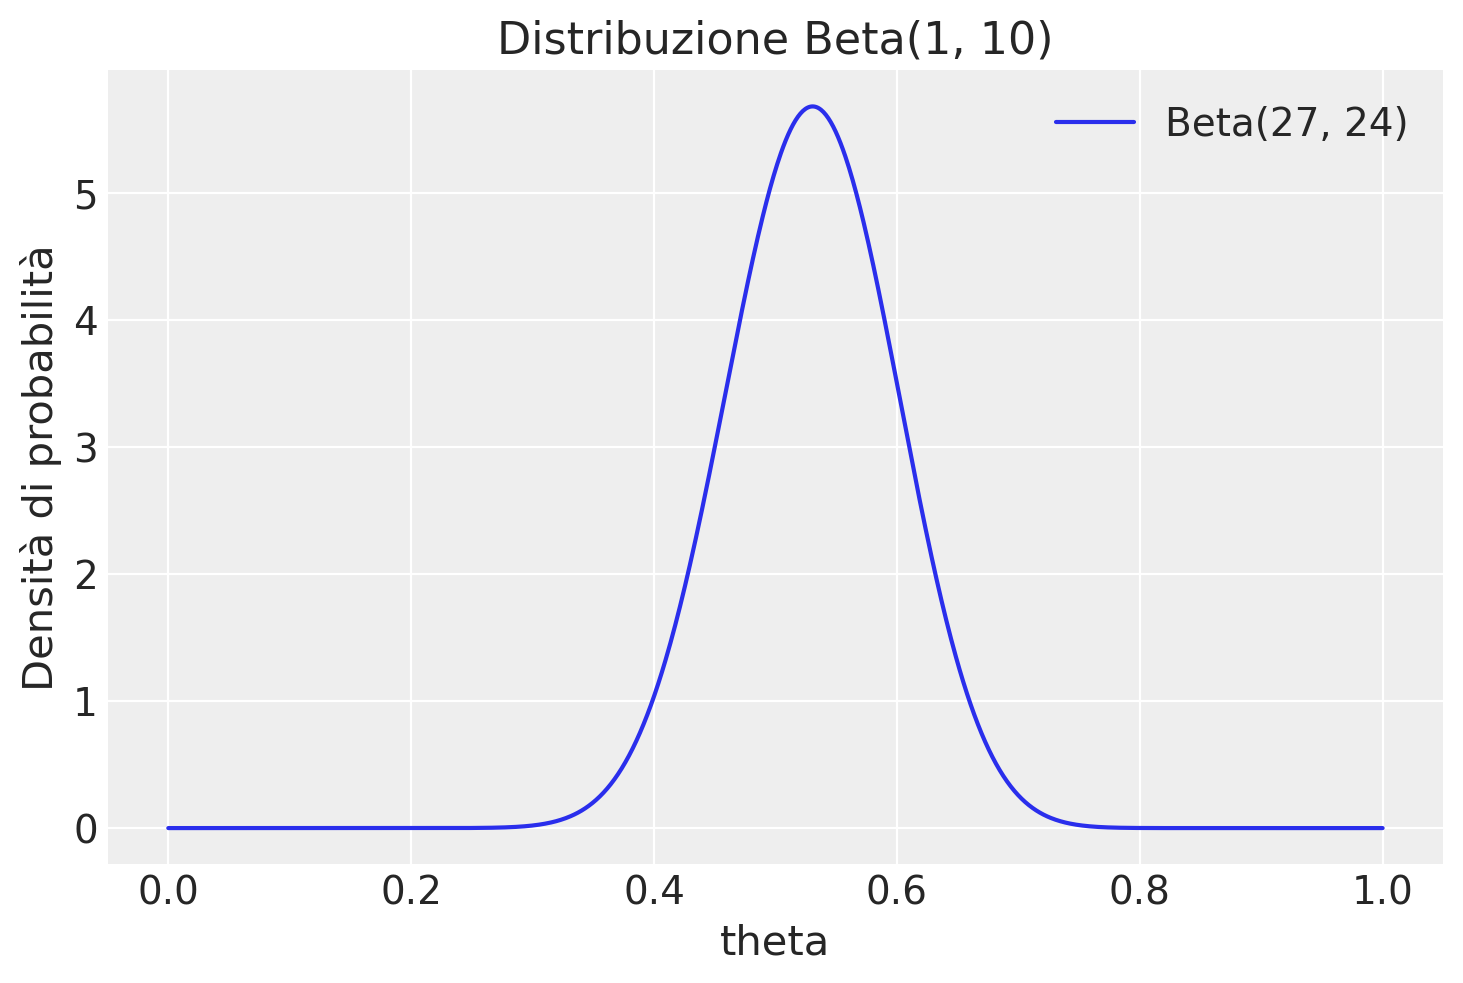

In [24]:

# Creazione di valori x per il plot
x_values = np.linspace(0, 1, 1000)

# Calcolo della densità di probabilità per ogni valore di x
beta_pdf = stats.beta.pdf(x_values, alpha_post, beta_post)

# Plot della densità di probabilità
plt.plot(x_values, beta_pdf, label='Beta(27, 24)')
plt.title('Distribuzione Beta(1, 10)')
plt.xlabel('theta')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.show()

Calcoliamo la media a posteriori di $\theta$:

In [7]:
alpha_post / (alpha_post + beta_post)

0.5294117647058824

Calcoliamo la moda a posteriori:

In [8]:
(alpha_post - 1) / (alpha_post + beta_post - 2)

0.5306122448979592

Calcoliamo la probabilità che $\theta > 0.6$

In [9]:
stats.beta.sf(0.6, alpha_post, beta_post)

0.15616833089995472

ovvero

In [10]:
1 - stats.beta.cdf(0.6, alpha_post, beta_post)


0.15616833089995474

Svolgiamo ora il problema usando il metodo basato su griglia. Definiamo la griglia di interesse:

In [11]:
theta = np.linspace(0, 1, 100)

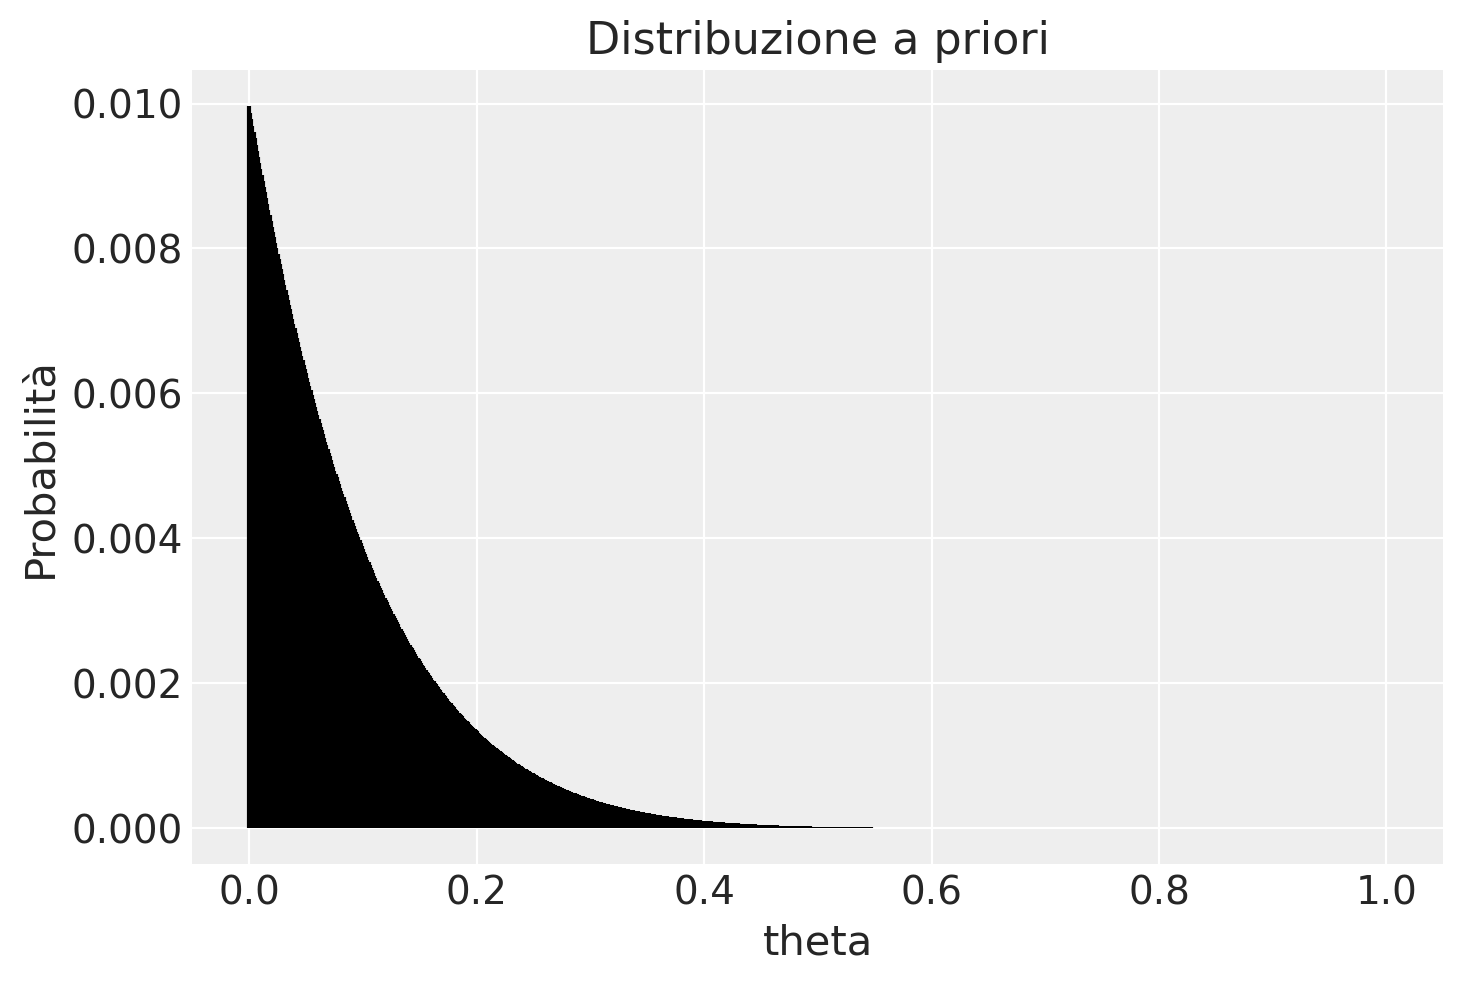

In [25]:
alpha_prior = 1  
beta_prior = 10   

# Calcolo della PDF della distribuzione Beta per i valori x
prior = stats.beta.pdf(theta, alpha_prior, beta_prior)

plt.vlines(theta, 0, prior / np.sum(prior), color='black', linestyle='-')
plt.xlabel('theta')
plt.ylabel('Probabilità')
plt.title('Distribuzione a priori')

plt.show()

Creiamo la verosimiglianza.

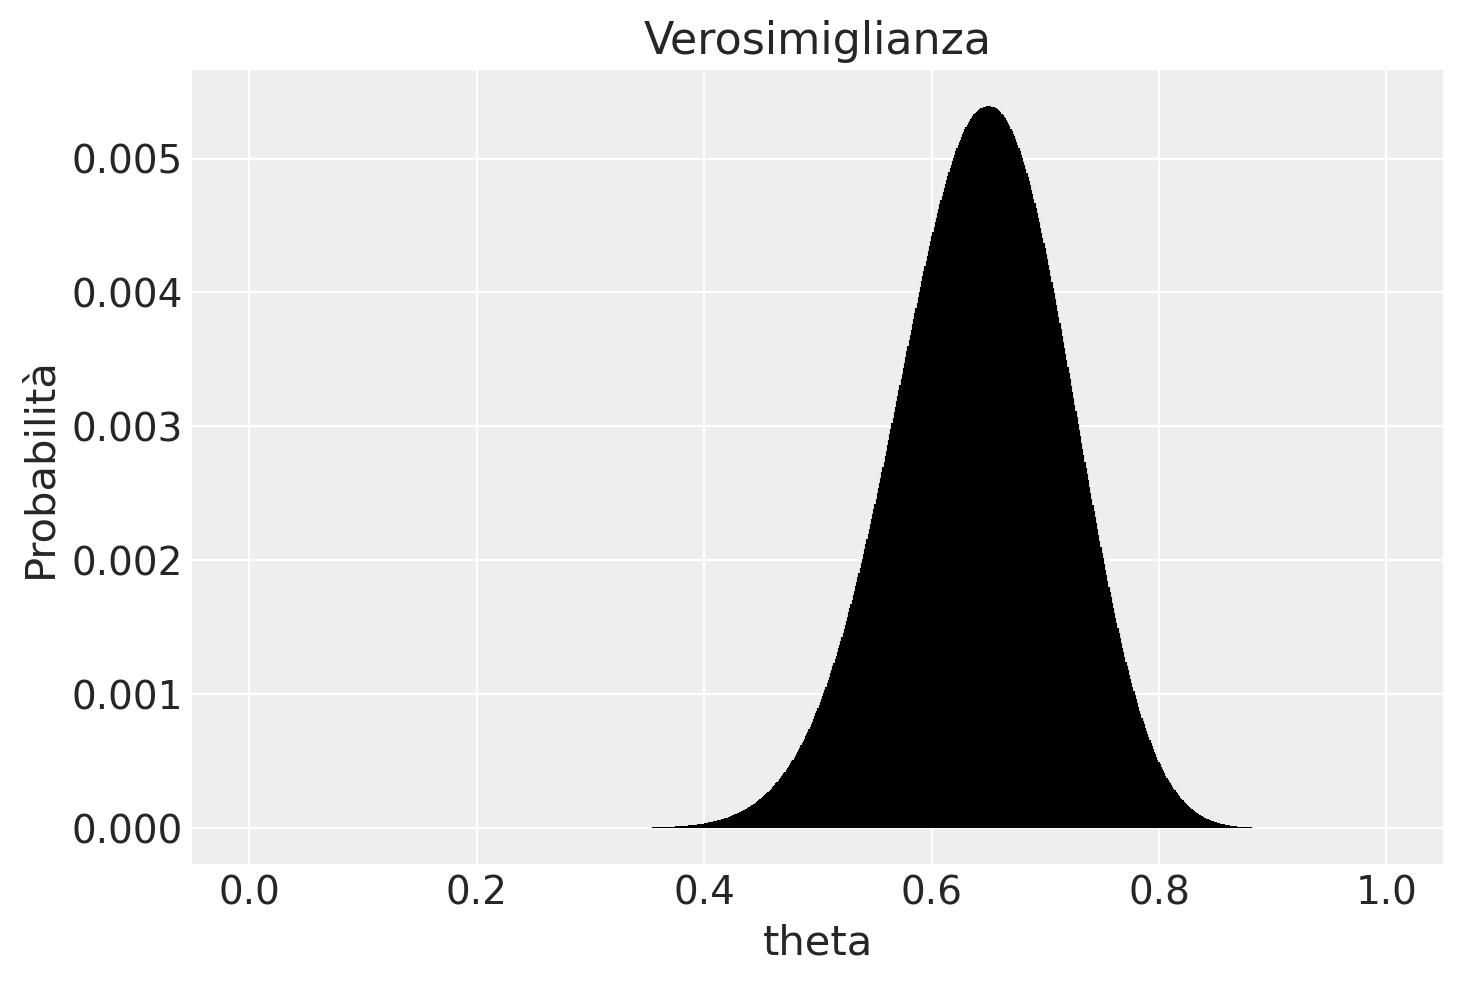

In [26]:
lk = stats.binom.pmf(y, n, theta)

plt.vlines(theta, 0, lk / np.sum(lk), color='black', linestyle='-')
plt.xlabel('theta')
plt.ylabel('Probabilità')
plt.title('Verosimiglianza')

plt.show()

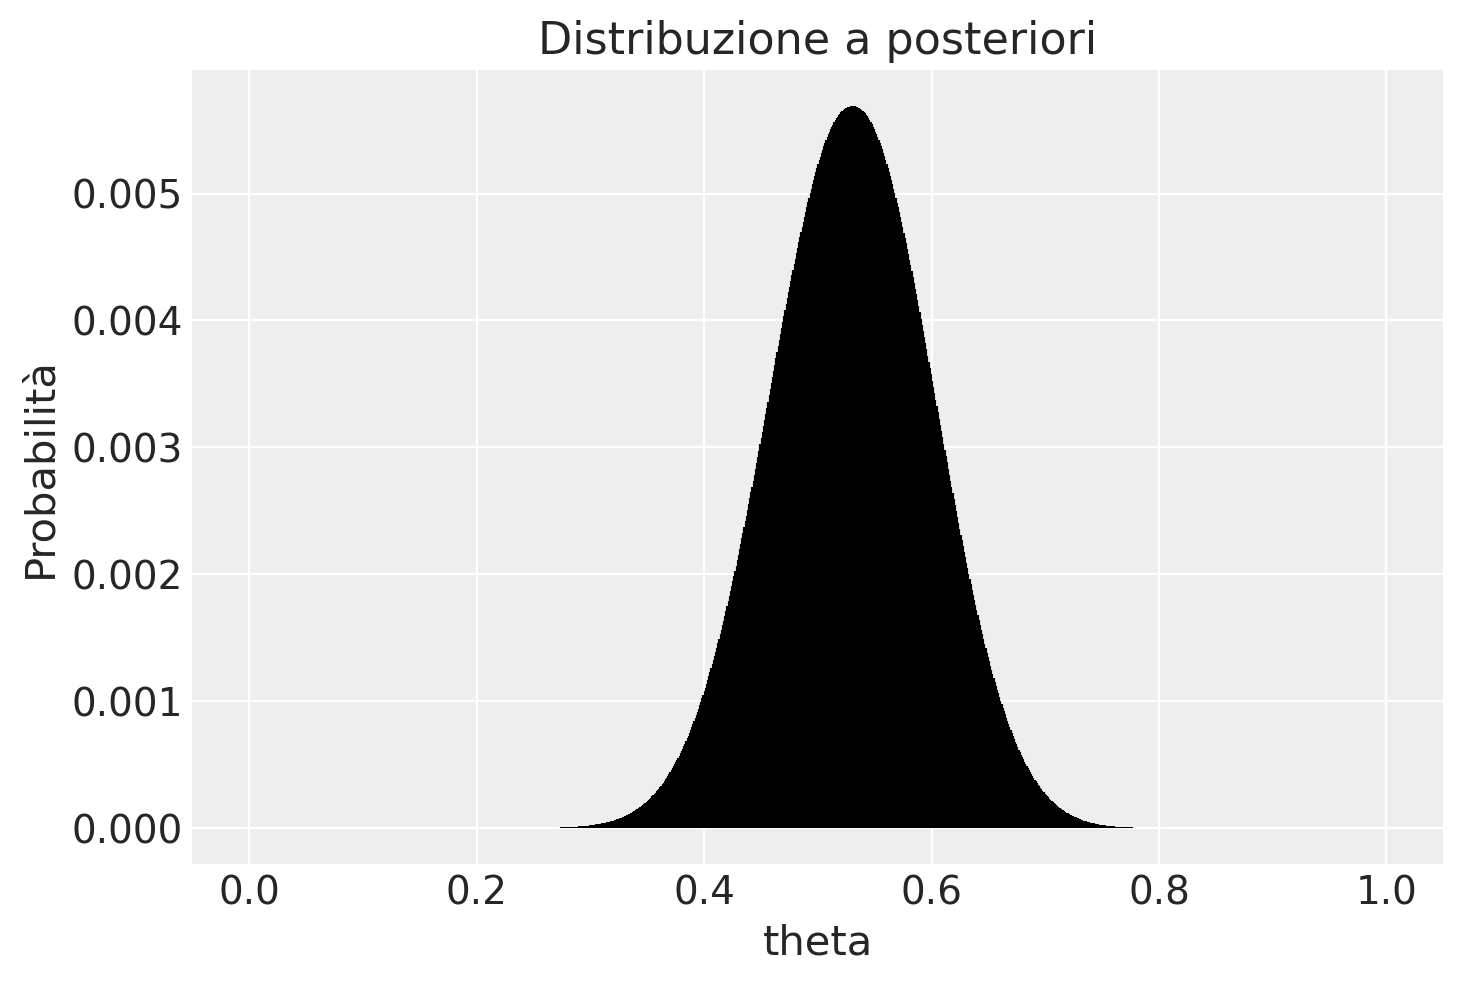

In [27]:
post = (prior * lk) / np.sum(prior * lk)

plt.vlines(theta, 0, post, color='black', linestyle='-')
plt.xlabel('theta')
plt.ylabel('Probabilità')
plt.title('Distribuzione a posteriori')

plt.show()

Estraiamo un campione dalla distribuzione a posteriori.

In [15]:
samples = np.random.choice(theta, p=post, size=int(1e6), replace=True)

Troviamo la media a posteriori.

In [16]:
np.mean(samples)

0.5295070606060605

Calcoliamo la probabilità che $\theta > 0.6$.

In [17]:
np.mean(samples > 0.6)

0.152237

## Principali distribuzioni coniugate

Esistono altre combinazioni di verosimiglianza e distribuzione a priori che producono una distribuzione a posteriori con la stessa forma della distribuzione a priori. Ecco alcune delle più note coniugazioni tra modelli statistici e distribuzioni a priori:

- Nel modello Normale-Normale $\mathcal{N}(\mu, \sigma^2_0)$, la distribuzione a priori è $\mathcal{N}(\mu_0, \tau^2)$ e la distribuzione a posteriori è $\mathcal{N}\left(\frac{\mu_0\sigma^2 + \bar{y}n\tau^2}{\sigma^2 + n\tau^2}, \frac{\sigma^2\tau^2}{\sigma^2 + n\tau^2} \right)$.

- Nel modello Poisson-gamma $\text{Po}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n \bar{y}, \delta +n)$.

- Nel modello esponenziale $\text{Exp}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n, \delta +n\bar{y})$.

- Nel modello uniforme-Pareto $\text{U}(0, \theta)$, la distribuzione a priori è $\text{Pa}(\alpha, \varepsilon)$ e la distribuzione a posteriori è $\text{Pa}(\alpha + n, \max(y_{(n)}, \varepsilon))$.

## Conclusioni

In conclusione, l'utilizzo di priori coniugati presenta vantaggi e svantaggi. Cominciamo con i vantaggi principali. Il principale vantaggio dell'adozione di distribuzioni a priori coniugate risiede nella loro capacità di rendere l'analisi della distribuzione a posteriori trattabile da un punto di vista analitico. Ad esempio, nel corso di questo capitolo abbiamo esaminato come sia possibile formulare la distribuzione a posteriori in seguito a un esperimento composto da una serie di prove di Bernoulli (con una verosimiglianza binomiale), utilizzando una distribuzione Beta sia per la prior che per il posteriore.

Tuttavia, è cruciale riconoscere che i modelli basati sul concetto di famiglie coniugate presentano delle limitazioni intrinseche. Le distribuzioni coniugate a priori sono disponibili solamente per distribuzioni di verosimiglianza di base e relativamente semplici. Per modelli complessi e più realistici, la ricerca di priori coniugati diventa spesso un compito estremamente arduo, limitando quindi la loro utilità. Inoltre, anche quando le distribuzioni a priori coniugate sono disponibili, un modello che ne fa uso potrebbe non essere sufficientemente flessibile per adattarsi alle nostre credenze iniziali. Ad esempio, un modello basato su una distribuzione normale è sempre unimodale e simmetrico rispetto alla media $\mu$. Tuttavia, se le nostre conoscenze iniziali non sono simmetriche o non seguono una distribuzione unimodale, la scelta di una distribuzione a priori normale potrebbe non risultare la più adeguata [@Johnson2022bayesrules].

## Informazioni sull'Ambiente di Sviluppo

In [18]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 02 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.18.0
scipy     : 1.13.0
matplotlib: 3.8.4
numpy     : 1.26.4

Watermark: 2.4.3

